In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/josaa-engineering-schools-seat-allocation-jee/2021.csv
/kaggle/input/josaa-engineering-schools-seat-allocation-jee/2017.csv
/kaggle/input/josaa-engineering-schools-seat-allocation-jee/2019.csv
/kaggle/input/josaa-engineering-schools-seat-allocation-jee/2020.csv
/kaggle/input/josaa-engineering-schools-seat-allocation-jee/2018.csv
/kaggle/input/josaa-engineering-schools-seat-allocation-jee/2022.csv
/kaggle/input/josaa-engineering-schools-seat-allocation-jee/2016.csv


** The objective is to trai the model using the past available data and then evaluate its performance on the data from the year 2022.**

#  The objective is to train the model using the past available data and then evaluate its performance on the data from the year 2022.

For the 2016 and 2017 data, we had no reservation based on gender, so taking that data into consideration wouldn't make sense.

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
#f1 = pd.read_csv('/kaggle/input/josaa-engineering-schools-seat-allocation-jee/2016.csv')
#f2 = pd.read_csv('/kaggle/input/josaa-engineering-schools-seat-allocation-jee/2017.csv')

f3 = pd.read_csv('/kaggle/input/josaa-engineering-schools-seat-allocation-jee/2018.csv')
f4 = pd.read_csv('/kaggle/input/josaa-engineering-schools-seat-allocation-jee/2019.csv')
f5 = pd.read_csv('/kaggle/input/josaa-engineering-schools-seat-allocation-jee/2020.csv')
f6 = pd.read_csv('/kaggle/input/josaa-engineering-schools-seat-allocation-jee/2021.csv')
train = pd.concat([f3,f4,f5,f6])
test = pd.read_csv('/kaggle/input/josaa-engineering-schools-seat-allocation-jee/2022.csv')
total = pd.concat([train,test])
train.head(2)

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Year,Round
0,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Gender-Neutral,5057,6780.0,2018,1
1,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Female-only (including Supernumerary),10078,10789.0,2018,1


# parameters
## I - Outputs
1. `Institute`
2. `Academic Program Name`

## II - Inputs
1. `Quota`
2. `Seat Type`
3. `Gender`
4. `Opening Rank`
5. `Closing Rank`
6. `Year`
7. `Round`


In [3]:
train.isnull().sum()

Institute                0
Academic Program Name    1
Quota                    1
Seat Type                2
Gender                   3
Opening Rank             4
Closing Rank             4
Year                     0
Round                    0
dtype: int64

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189636 entries, 0 to 31889
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Institute              189636 non-null  object
 1   Academic Program Name  189635 non-null  object
 2   Quota                  189635 non-null  object
 3   Seat Type              189634 non-null  object
 4   Gender                 189633 non-null  object
 5   Opening Rank           189632 non-null  object
 6   Closing Rank           189632 non-null  object
 7   Year                   189636 non-null  int64 
 8   Round                  189636 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 14.5+ MB


In [5]:
train = train.dropna()
test = test.dropna()
non_integers = list(set(train["Opening Rank"][~train["Opening Rank"].apply(lambda x: str(x).isdigit())]))
print(non_integers)


['38P', '845P', '405P', '830P', '406P', '68P', '786P', '1990P', '215P', '111P', '1327P', '1539P', '743P', '793P', '940P', '785P', '108P', '226P', '409P', '741P', '1185P', '660P', '207P', '116P', '693P', '580P', '285P', '937P', '1362P', '12P', '137P', '615P', '162P', '323P', '541P', '836P', '1388P', '166P', '776P', '174P', '48P', '709P', '575P', '62P', '887P', '778P', '382P', '594P', '1135P', '804P', '189P', '93P', '447P', '241P', '839P', '417P', '617P', '102P', '1397P', '454P', '36P', '76P', '1201P', '420P', '1229P', '718P', '1679P', '1269P', '236P', '746P', '764P', '325P', '200P', '665P', '1757P', '1705P', '212P', '815P', '220P', '23P', '444P', '1225P', '254P', '316P', '1240P', '1253P', '560P', '58P', '1124P', '716P', '769P', '153P', '493P', '678P', '1064P', '175P', '1392P', '195P', '1055P', '557P', '876P', '761P', '567P', '1207P', '1512P', '442P', '252P', '57P', '703P', '1094P', '1387P', '192P', '209P', '1045P', '532P', '640P', '1232P', '64P', '607P', '1160P', '117P', '1501P', '467P'

In [6]:
import re
def to_numeric(x):
    x = str(x)
    x = x.replace(",", "")
    x = re.sub("[a-zA-Z]", "", x)
   
    return float(x) if '.' in x else int(x)

# Convert train data columns to numeric and integer types
train["Opening Rank"] = train["Opening Rank"].apply(to_numeric)
train["Closing Rank"] = train["Closing Rank"].apply(to_numeric)
train["Opening Rank"] = train["Opening Rank"].astype(int)
train["Closing Rank"] = train["Closing Rank"].astype(int)

# Convert test data columns to numeric and integer types
test["Opening Rank"] = test["Opening Rank"].apply(to_numeric)
test["Closing Rank"] = test["Closing Rank"].apply(to_numeric)
test["Opening Rank"] = test["Opening Rank"].astype(int)
test["Closing Rank"] = test["Closing Rank"].astype(int)

# Check for non-integer values in the train data
non_integers = list(set(train["Opening Rank"][~train["Opening Rank"].apply(lambda x: str(x).isdigit())]))
print(len(non_integers))


0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189632 entries, 0 to 31889
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Institute              189632 non-null  object
 1   Academic Program Name  189632 non-null  object
 2   Quota                  189632 non-null  object
 3   Seat Type              189632 non-null  object
 4   Gender                 189632 non-null  object
 5   Opening Rank           189632 non-null  int64 
 6   Closing Rank           189632 non-null  int64 
 7   Year                   189632 non-null  int64 
 8   Round                  189632 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 14.5+ MB


In [8]:
train.head()

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Year,Round
0,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Gender-Neutral,5057,6780,2018,1
1,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Female-only (including Supernumerary),10078,10789,2018,1
2,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OBC-NCL,Gender-Neutral,1649,2592,2018,1
3,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OBC-NCL,Female-only (including Supernumerary),4343,4522,2018,1
4,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,SC,Gender-Neutral,1054,1233,2018,1


In [9]:
train.isnull().sum()

Institute                0
Academic Program Name    0
Quota                    0
Seat Type                0
Gender                   0
Opening Rank             0
Closing Rank             0
Year                     0
Round                    0
dtype: int64

In [10]:
train.duplicated().sum()

0

In [11]:
# concatenate train and test datasets
combined = pd.concat([train, test], axis=0)
# create an instance of the encoder
encoder = LabelEncoder()

# loop through each column to encode
for col in ['Institute', 'Academic Program Name']:
    # fit the encoder on the combined dataset
    encoder.fit(combined[col])
    # encode the training and testing data using the same encoder
    train[col] = encoder.transform(train[col])
    test[col] = encoder.transform(test[col])
train.head(2)

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Year,Round
0,41,52,AI,OPEN,Gender-Neutral,5057,6780,2018,1
1,41,52,AI,OPEN,Female-only (including Supernumerary),10078,10789,2018,1


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189632 entries, 0 to 31889
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Institute              189632 non-null  int64 
 1   Academic Program Name  189632 non-null  int64 
 2   Quota                  189632 non-null  object
 3   Seat Type              189632 non-null  object
 4   Gender                 189632 non-null  object
 5   Opening Rank           189632 non-null  int64 
 6   Closing Rank           189632 non-null  int64 
 7   Year                   189632 non-null  int64 
 8   Round                  189632 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 14.5+ MB


#Scaling the Year, Rpening Rank, Closing Rank, Round column

In [13]:
train.describe()

,Institute,Academic Program Name,Opening Rank,Closing Rank,Year,Round
count,189632.000000,189632.000000,1.896320e+05,1.896320e+05,189632.000000,189632.000000
mean,67.599255,101.752362,9.709113e+03,1.278893e+04,2019.388162,3.783254
std,29.654604,56.641832,3.061512e+04,4.286135e+04,1.069319,1.941926
min,0.000000,0.000000,1.000000e+00,1.000000e+00,2018.000000,1.000000
25%,46.000000,52.000000,9.360000e+02,1.166000e+03,2018.000000,2.000000
50%,72.000000,88.000000,3.122000e+03,3.881000e+03,2019.000000,4.000000
75%,92.000000,155.000000,8.642000e+03,1.065400e+04,2020.000000,5.000000
max,118.000000,221.000000,1.082601e+06,1.144790e+06,2022.000000,7.000000


In [14]:
x_train = train.drop(["Academic Program Name", "Institute"], axis=1)
x_test = test.drop(["Academic Program Name", "Institute"], axis=1)


In [15]:
total = pd.concat([train,test])
total.corr()

,Institute,Academic Program Name,Opening Rank,Closing Rank,Year,Round
Institute,1.000000,-0.004537,0.085328,0.085255,-0.030408,-0.003044
Academic Program Name,-0.004537,1.000000,0.029281,0.022552,0.002970,-0.000947
Opening Rank,0.085328,0.029281,1.000000,0.917538,0.008188,0.018114
Closing Rank,0.085255,0.022552,0.917538,1.000000,-0.002955,0.020236
Year,-0.030408,0.002970,0.008188,-0.002955,1.000000,-0.073123
Round,-0.003044,-0.000947,0.018114,0.020236,-0.073123,1.000000


Text(0.5, 1.0, 'Correlation Matrix of Dataset')

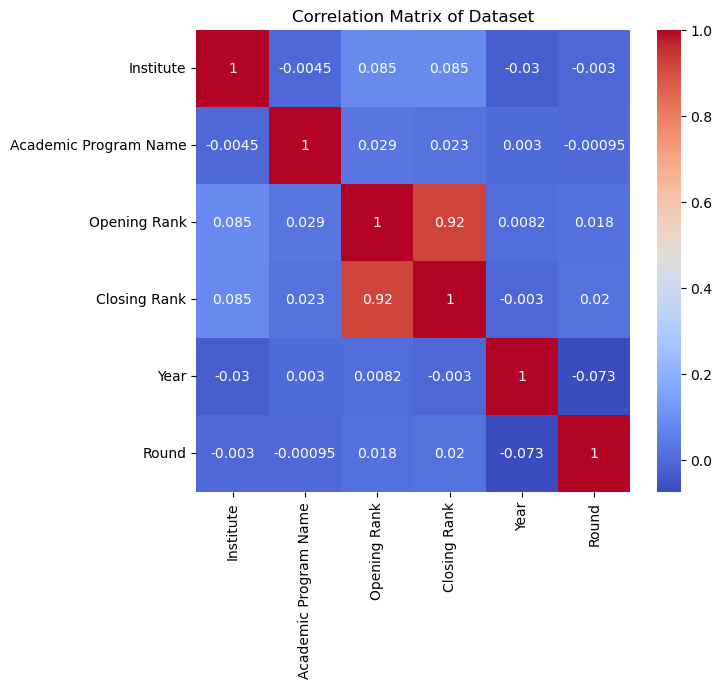

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.heatmap(data=df.corr(),annot=True, cmap="coolwarm")
corr_matrix = total.corr()

# Create heatmap with larger size
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=ax)
ax.set_title("Correlation Matrix of Dataset")

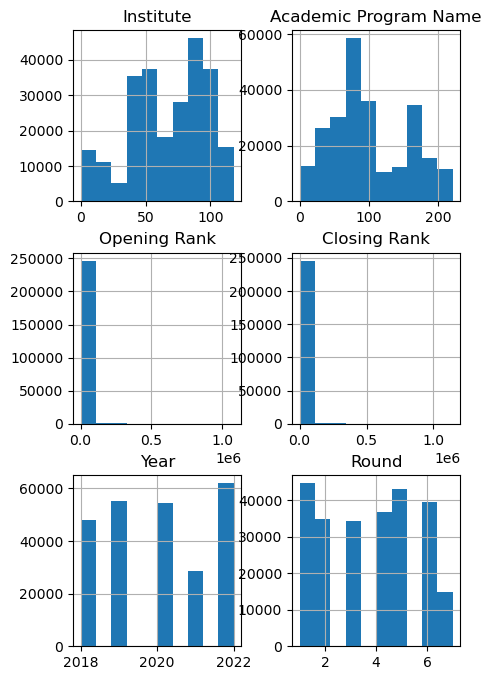

In [17]:
import matplotlib.pyplot as plt
total.hist(figsize=(5,8))
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
columns_to_scale = ['Opening Rank', 'Closing Rank', 'Year','Round']
scaler = StandardScaler()
scaler.fit(train[columns_to_scale])
train[columns_to_scale] = scaler.transform(train[columns_to_scale])
test[columns_to_scale] = scaler.transform(test[columns_to_scale])

train.head(2)

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Year,Round
0,41,52,AI,OPEN,Gender-Neutral,-0.151955,-0.140195,-1.298178,-1.433248
1,41,52,AI,OPEN,Female-only (including Supernumerary),0.012049,-0.046660,-1.298178,-1.433248


Text(0.5, 1.0, 'Correlation Matrix of Dataset')

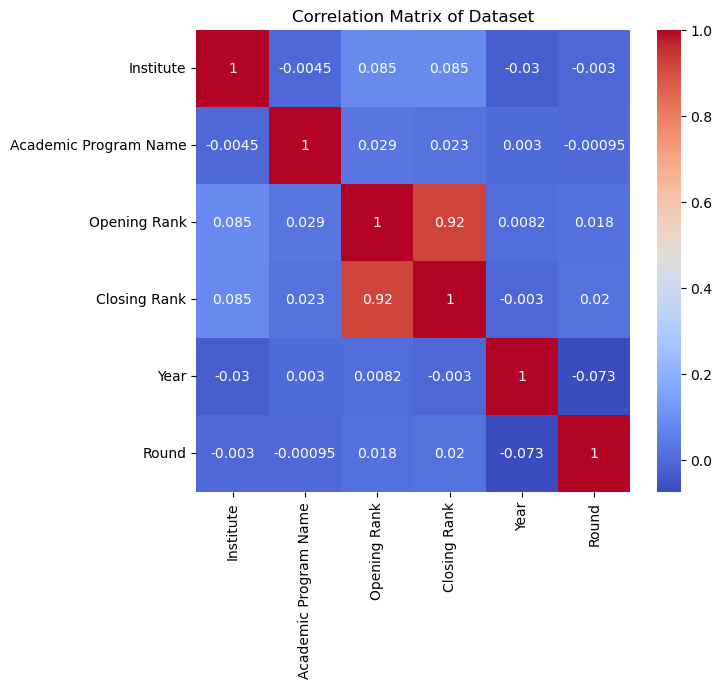

In [19]:
total = pd.concat([train,test])
corr_matrix = total.corr()

# Create heatmap with larger size
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=ax)
ax.set_title("Correlation Matrix of Dataset")

In [20]:
x_train.head(2)

,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Year,Round
0,AI,OPEN,Gender-Neutral,5057,6780,2018,1
1,AI,OPEN,Female-only (including Supernumerary),10078,10789,2018,1


> We will obtain results for 'Quota', 'Seat Type', and 'Gender' by applying Onehot encoding and Ordinal encoding.

> ***Using Onehot Encoding***

In [21]:
from sklearn.compose import ColumnTransformer
# transformer = ColumnTransformer(transformers=[
#     ('tnf1',SimpleImputer(),['fever']),
#     ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
#     ('tnf3',OneHotEncoder(sparse=False,drop='first'),['gender','city'])
# ],remainder='passthrough')
"""SimpleImputer is used to handle missing values in the dataset.
It replaces missing values in a column with a specified strategy, such as mean, median, mode,
or a user-defined constant value."""
transformer = ColumnTransformer(transformers=[
    ('tnf3',OneHotEncoder(sparse=False,drop='first'),['Quota', 'Seat Type', 'Gender'])
],remainder='passthrough')

x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)
print(x_test)

[[0.0000e+00 0.0000e+00 0.0000e+00 ... 1.1771e+04 2.0220e+03 1.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 2.0164e+04 2.0220e+03 1.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 1.7440e+03 2.0220e+03 1.0000e+00]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 2.4055e+04 2.0220e+03 6.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 1.2435e+04 2.0220e+03 6.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 5.4090e+03 2.0220e+03 6.0000e+00]]


In [22]:
x_test.shape

(58874, 20)

In [23]:
x_train.shape

(189632, 20)

In [24]:
y_train = train.iloc[:, 0].values.ravel()
y_test = test.iloc[:, 0].values.ravel()
y_train.shape

(189632,)

In [25]:
y_train

array([ 41,  41,  41, ..., 104, 104, 104])

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
regressor = LinearRegression()

# Train the model using the training sets
regressor.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = regressor.predict(x_test)

# Print the performance metrics
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))
print(regressor.score(x_test, y_test))

Mean squared error: 597.92
Coefficient of determination (R^2): 0.34
0.335930194372956


In [27]:
# Import the necessary libraries
from sklearn.metrics import confusion_matrix

# Convert the continuous target variable to binary classes
y_test_class = np.where(y_test > np.mean(y_train), 1, 0)
y_pred_class = np.where(y_pred > np.mean(y_train), 1, 0)

# Compute the confusion matrix
confusion_matrix = confusion_matrix(y_test_class, y_pred_class)
print(confusion_matrix)


[[22925  3214]
 [ 2106 30629]]


In [28]:
# Import the necessary libraries
from sklearn.metrics import precision_recall_fscore_support

# Convert the continuous target variable to binary classes
y_test_class = np.where(y_test > np.mean(y_train), 1, 0)
y_pred_class = np.where(y_pred > np.mean(y_train), 1, 0)

# Compute the precision, recall, F1-score, and support
precision, recall, f1_score, support = precision_recall_fscore_support(y_test_class, y_pred_class)

# Print the result
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1_score)
print('Support:', support)


Precision: [0.91586433 0.90503206]
Recall: [0.87704197 0.93566519]
F1-score: [0.89603283 0.92009372]
Support: [26139 32735]


In [29]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
# from lightgbm import LGBMClassifier
# from sklearn.metrics import accuracy_score

# import warnings
# warnings.filterwarnings("ignore")

# models = {
#     "Logistic": LogisticRegression(),
#     "rfClassifier": RandomForestClassifier(n_estimators=100, max_depth=10),
#     "tree": DecisionTreeClassifier(max_depth = 5, criterion = "gini"),
#     "knClassifier": KNeighborsClassifier(n_neighbors = 5),
#     "gBoost": GradientBoostingClassifier(n_estimators=100, max_depth=10),
#     "Ada Boost": AdaBoostClassifier(n_estimators = 150),
#     "lightGBM": LGBMClassifier(n_estimators=100, max_depth=10),
# }

# accuracy_scores = []
# predicted = []

# for i in models:
#     models[i].fit(x_train, y_train)
#     y_pred = models[i].predict(x_test)
#     accuracy_scores.append(int(accuracy_score(y_pred, y_test) * 100))
#     predicted.append(y_pred)

# for j, k in zip(accuracy_scores, models):
#     print (' ', k, ' accuracy : ', j, ' %  ')

In [30]:
# plt.figure(figsize = (25, 8))
# ax = sns.barplot(x = list(models.keys()), y = accuracy_scores)
# for i in ax.patches:
#     width, height = i.get_width(), i.get_height()
#     x, y = i.get_xy()
#     ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center')

# print (list(models.keys())[accuracy_scores.index(max(accuracy_scores))], " : " ,max(accuracy_scores), " %")